In [21]:
# read json file
import json
import pandas as pd
import numpy as np

# read json file
with open('characters.json') as f:
    data = json.load(f)


In [45]:
# convert json to dataframe where each row is a character and each column is a key
df = pd.DataFrame(data['characters'])

df.head()

# remove rows with no character link
df = df[df['characterLink'].notnull()]



# remove characterImageThumb, characterImageFull, marriedEngaged, kingsguard, guardedBy, servedBy, guardianOf
df = df.drop(['characterImageThumb', 'characterImageFull', 'kingsguard'], axis=1)

# print rows where housename is not nan
df[df['houseName'].notnull()]

# remove all columns except characterName and houseName
df = df[['characterName', 'houseName', 'marriedEngaged', 'parentOf' , 'siblings', 'guardianOf', 'guardedBy', 'parents']]

# remove all characters that have a nan houseName
#df = df[df['houseName'].notnull()]
df
# print size of dataframe
print(df.shape)

(368, 8)


In [46]:
df

,characterName,houseName,marriedEngaged,parentOf,siblings,guardianOf,guardedBy,parents
0,Addam Marbrand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aeron Greyjoy,Greyjoy,NaN,NaN,"[Balon Greyjoy, Euron Greyjoy]",NaN,NaN,NaN
3,Aerys II Targaryen,Targaryen,[Rhaella Targaryen],"[Daenerys Targaryen, Rhaegar Targaryen, Visery...",[Rhaella Targaryen],NaN,NaN,NaN
4,Akho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alliser Thorne,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
384,Young Nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,Young Ned,Stark,NaN,NaN,NaN,NaN,NaN,NaN
386,Young Ned Stark,Stark,NaN,NaN,NaN,NaN,NaN,NaN
387,Young Rodrik Cassel,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Make a network for all characters

328
328
188
('Addam Marbrand', {'houseName': 'None', 'marriedEngaged': 'None', 'parentOf': 'None', 'siblings': 'None', 'guardianOf': 'None', 'guardedBy': 'None'})
[]
('Aeron Greyjoy', {'houseName': 'Greyjoy', 'marriedEngaged': 'None', 'parentOf': 'None', 'siblings': ['Balon Greyjoy', 'Euron Greyjoy'], 'guardianOf': 'None', 'guardedBy': 'None'})
[('Aeron Greyjoy', 'Balon Greyjoy'), ('Aeron Greyjoy', 'Euron Greyjoy'), ('Aeron Greyjoy', 'Theon Greyjoy')]
('Aerys II Targaryen', {'houseName': 'Targaryen', 'marriedEngaged': ['Rhaella Targaryen'], 'parentOf': ['Daenerys Targaryen', 'Rhaegar Targaryen', 'Viserys Targaryen'], 'siblings': ['Rhaella Targaryen'], 'guardianOf': 'None', 'guardedBy': 'None'})
[('Aerys II Targaryen', 'Daenerys Targaryen'), ('Aerys II Targaryen', 'Maester Aemon'), ('Aerys II Targaryen', 'Viserys Targaryen')]
('Akho', {'houseName': 'None', 'marriedEngaged': 'None', 'parentOf': 'None', 'siblings': 'None', 'guardianOf': 'None', 'guardedBy': 'None'})
[]
('Alliser Thorne', 

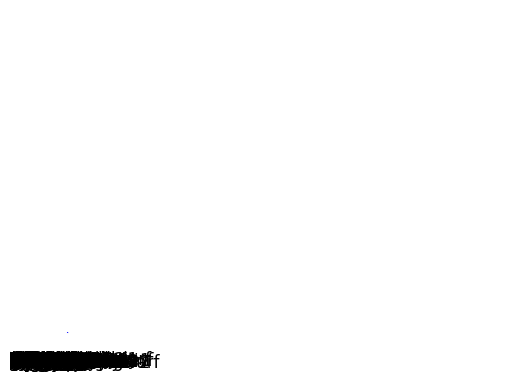

(None, None)

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# create graph
G = nx.Graph()

# add nodes for each character name, make the house name of each character and killed the node attribute
for i in range(df.shape[0]):
    if 'characterName' in df and 'houseName' in df and 'marriedEngaged' in df:
        if i in df.index:
            G.add_node(df['characterName'][i], houseName=df['houseName'][i], marriedEngaged=df['marriedEngaged'][i], parentOf=df['parentOf'][i], siblings=df['siblings'][i], guardianOf=df['guardianOf'][i], guardedBy=df['guardedBy'][i], parents=df['parents'][i])
print(G.number_of_nodes())
# add edges between characters, where they have the same house name
# for i in range(df.shape[0]):
#     for j in range(i+1, df.shape[0]):
#         if 'houseName' in df and i in df.index and j in df.index:
#             if df['houseName'][i] == df['houseName'][j]:
#                 G.add_edge(df['characterName'][i], df['characterName'][j])
for i in range(df.shape[0]):
    if 'houseName' in df and i in df.index and type(df['houseName'][i]) == str:
        houses_i = df['houseName'][i].split(',')
        for house_i in houses_i:
            for j in range(i+1, df.shape[0]):
                if 'houseName' in df and j in df.index and type(df['houseName'][j]) == str:
                    houses_j = df['houseName'][j].split(',')
                    for house_j in houses_j:
                        if house_i.strip() == house_j.strip():
                            G.add_edge(df['characterName'][i], df['characterName'][j])
                            break
# add edge between two nodes if one is the guardian of the other
for i in range(df.shape[0]):
    for j in range(i+1, df.shape[0]):
        if 'guardianOf' in df and i in df.index and j in df.index:
            if df['guardianOf'][i] != df['guardianOf'][i] or df['guardianOf'][j] != df['guardianOf'][j]:
                continue
            for name_i in df['guardianOf'][i]:
                for name_j in df['guardianOf'][j]:
                    if df['characterName'][i] == name_j or df['characterName'][j] == name_i:
                        G.add_edge(df['characterName'][i], df['characterName'][j])


# add edge between two nodes if one is guarded by the other
for i in range(df.shape[0]):
    for j in range(i+1, df.shape[0]):
        if 'guardedBy' in df and i in df.index and j in df.index:
            if df['guardedBy'][i] != df['guardedBy'][i] or df['guardedBy'][j] != df['guardedBy'][j]:
                continue
            for name_i in df['guardedBy'][i]:
                for name_j in df['guardedBy'][j]:
                    if df['characterName'][i] == name_j or df['characterName'][j] == name_i:
                        G.add_edge(df['characterName'][i], df['characterName'][j])


# add edge between two nodes if one character is included in parents of the other
for i in range(df.shape[0]):
    for j in range(i+1, df.shape[0]):
        if 'parents' in df and i in df.index and j in df.index:
            if df['parents'][i] != df['parents'][i] or df['parents'][j] != df['parents'][j]:
                continue
            for name_i in df['parents'][i]:
                for name_j in df['parents'][j]:
                    if df['characterName'][i] == name_j or df['characterName'][j] == name_i:
                        G.add_edge(df['characterName'][i], df['characterName'][j])



# add edge between two nodes if they have been married or engaged to each other. If they have been married or engaged to multiple people, add an edge for each person they have been married or engaged to
for i in range(df.shape[0]):
    for j in range(i+1, df.shape[0]):
        if 'marriedEngaged' in df and i in df.index and j in df.index:
            if df['marriedEngaged'][i] != df['marriedEngaged'][i] or df['marriedEngaged'][j] != df['marriedEngaged'][j]:
                continue
            for name_i in df['marriedEngaged'][i]:
                for name_j in df['marriedEngaged'][j]:
                    if df['characterName'][i] == name_j or df['characterName'][j] == name_i:
                        G.add_edge(df['characterName'][i], df['characterName'][j])


# add edge between two nodes if one is the parent of the other
# for i in range(df.shape[0]):
#     if 'characterName' in df and 'parentOf' in df and i in df.index:
#         if isinstance(df['parentOf'][i], str):
#             parentOf = df['parentOf'][i].split(',')
#             for parent in parentOf:
#                 parent = parent.strip()
#                 if parent in df['characterName'].tolist():
#                     G.add_edge(df['characterName'][i], parent)
# add edge between two nodes if one is the parent of the other
# add edge between two nodes if one is the parent of the other
for i in range(df.shape[0]):
    if 'characterName' in df and 'parentOf' in df and i in df.index:
        if isinstance(df['parentOf'][i], str):
            parentOf = df['parentOf'][i].split(',')
            for parent in parentOf:
                parent = parent.strip()
                if parent in df['characterName'].tolist():
                    G.add_edge(parent, df['characterName'][i])




# add edge between two nodes if they are siblings
for i in range(df.shape[0]):
    for j in range(i+1, df.shape[0]):
        if 'siblings' in df and i in df.index and j in df.index:
            siblings_i = df['siblings'][i]
            siblings_j = df['siblings'][j]
            if siblings_i is not np.nan and df['characterName'][j] in siblings_i:
                G.add_edge(df['characterName'][i], df['characterName'][j])
            elif siblings_j is not np.nan and df['characterName'][i] in siblings_j:
                G.add_edge(df['characterName'][j], df['characterName'][i])


# if parents has nan, replace nan by 'None'
for node in G.nodes(data=True):
    if node[1]['parents'] != node[1]['parents']:
        node[1]['parents'] = 'None'

# if house name has nan, replace nan by 'None'
for node in G.nodes(data=True):
    if node[1]['houseName'] != node[1]['houseName']:
        node[1]['houseName'] = 'None'

# if guarded by has nan, replace nan by 'None'
for node in G.nodes(data=True):
    if node[1]['guardedBy'] != node[1]['guardedBy']:
        node[1]['guardedBy'] = 'None'
        
# if guardian has nan, replace nan by 'None'
for node in G.nodes(data=True):
    if node[1]['guardianOf'] != node[1]['guardianOf']:
        node[1]['guardianOf'] = 'None'

# if killed has nan, replace nan by 'None
for node in G.nodes(data=True):
    if node[1]['marriedEngaged'] != node[1]['marriedEngaged']:
        node[1]['marriedEngaged'] = 'None'

# if parent has nan, replace nan by 'None
for node in G.nodes(data=True):
    if node[1]['parentOf'] != node[1]['parentOf']:
        node[1]['parentOf'] = 'None'

# if siblings has nan, replace nan by 'None
for node in G.nodes(data=True):
    if node[1]['siblings'] != node[1]['siblings']:
        node[1]['siblings'] = 'None'

# print number edges and nodes
print(G.number_of_nodes())
print(G.number_of_edges())

# print nodes and their edges
for node in G.nodes(data=True):
    print(node)
    print(G.edges(node[0]))

# visualize graph
fig, ax = plt.subplots()
nx.draw(G, with_labels=True, ax=ax, node_size=10, node_color='red', edge_color='blue', width=0.1)
plt.show()


# visualize using netwulf
import netwulf as nw
nw.visualize(G)


